##### Sharpe Ratio

* Represents both risk and return
* Developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to it risk

##### Formula

The goal is to get high Sharpe Ratio

![alt text](SharpeRatio.png)

##### Need to understand

* Portfolio return (done in part 1)
* Risk free return
* Standard deviation of portfolio (or the risk)

##### Resources

* **Risk free return** 10 year Treasury Note 
* Sharpe Ratio https://www.investopedia.com/terms/s/sharperatio.asp
* Standard deviation https://www.investopedia.com/terms/s/standarddeviation.asp

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import datetime as dt

In [6]:
tickers = ["AAPL", "MSFT", "IBM"]
start = dt.datetime(2021,1,1)

data = pdr.get_data_stooq(tickers,start)

In [7]:
data = data[::-1]

In [8]:
data.head()

Attributes    Close                       High                        Low  \
Symbols        AAPL     MSFT      IBM     AAPL     MSFT      IBM     AAPL   
Date                                                                        
2021-01-04  127.880  213.881  112.435  132.027  219.104  114.222  125.268   
2021-01-05  129.445  214.080  114.427  130.173  214.686  114.905  126.902   
2021-01-06  125.108  208.530  117.277  129.485  212.700  119.629  124.889   
2021-01-07  129.355  214.458  117.013  130.063  215.500  118.340  126.334   
2021-01-08  130.482  215.778  116.593  131.061  216.711  117.296  128.698   

Attributes                       Open                          Volume  \
Symbols        MSFT      IBM     AAPL     MSFT      IBM          AAPL   
Date                                                                    
2021-01-04  211.052  111.616  131.937  218.637  114.154  1.450221e+08   
2021-01-05  211.916  113.041  127.362  213.464  113.392  9.883730e+07   
2021-01-06  208.233  114.945  126.195  208.461  115.119  1.569497e+08   
2021-01-07  209.960  116.350  126.834  210.287  117.969  1.108936e+08   
2021-01-08  213.236  115.198  130.861  214.845  116.623  1.064206e+08   

Attributes                              
Symbols             MSFT           IBM  
Date                                    
2021-01-04  3.779221e+07  5.709524e+06  
2021-01-05  2.424774e+07  6.740776e+06  
2021-01-06  3.657133e+07  8.771536e+06  
2021-01-07  2.818830e+07  4.968954e+06  
2021-01-08  2.336554e+07  5.155374e+06

In [9]:
data = data['Close']

In [10]:
data

Symbols,AAPL,MSFT,IBM
Date,,,
2021-01-04,127.880,213.881,112.435
2021-01-05,129.445,214.080,114.427
2021-01-06,125.108,208.530,117.277
2021-01-07,129.355,214.458,117.013
2021-01-08,130.482,215.778,116.593
...,...,...,...
2023-03-08,152.870,253.700,128.050
2023-03-09,150.590,252.320,126.160
2023-03-10,148.500,248.590,125.450


In [11]:
portfolio = [0.40,0.35,0.25]

In [12]:
np.sum(portfolio)

1.0

In [15]:
np.log(data/data.shift()) #percentage change

Symbols,AAPL,MSFT,IBM
Date,,,
2021-01-04,NaN,NaN,NaN
2021-01-05,0.012164,0.000930,0.017562
2021-01-06,-0.034079,-0.026267,0.024602
2021-01-07,0.033383,0.028031,-0.002254
2021-01-08,0.008675,0.006136,-0.003596
...,...,...,...
2023-03-08,0.008342,-0.001772,-0.001561
2023-03-09,-0.015027,-0.005454,-0.014870
2023-03-10,-0.013976,-0.014893,-0.005644


In [18]:
np.sum(np.log(data/data.shift())*portfolio,axis=1)

Date
2021-01-04    0.000000
2021-01-05    0.009581
2021-01-06   -0.016674
2021-01-07    0.022601
2021-01-08    0.004719
                ...   
2023-03-08    0.002327
2023-03-09   -0.011637
2023-03-10   -0.012214
2023-03-13    0.012955
2023-03-14    0.013082
Length: 552, dtype: float64

In [20]:
log_return = np.sum(np.log(data/data.shift())*portfolio,axis=1)
log_return

Date
2021-01-04    0.000000
2021-01-05    0.009581
2021-01-06   -0.016674
2021-01-07    0.022601
2021-01-08    0.004719
                ...   
2023-03-08    0.002327
2023-03-09   -0.011637
2023-03-10   -0.012214
2023-03-13    0.012955
2023-03-14    0.013082
Length: 552, dtype: float64

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot: >

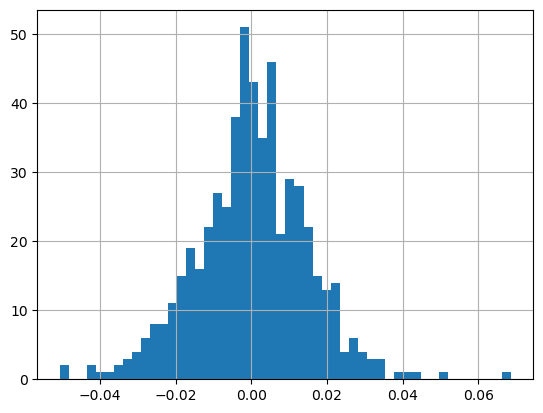

In [22]:
fig, ax=plt.subplots()
log_return.hist(bins=50,ax=ax)

In [23]:
log_return.std()

0.014773204094032428

In [24]:
log_return.mean()

0.00030045658154831493

In [30]:
sharpe_ratio = log_return.mean()/log_return.std()
sharpe_ratio

0.020337942915828466

In [48]:
asr = sharpe_ratio*252**.5
asr

0.32285483480345983

In [53]:
weight = np.random.random(3)
weight /= weight.sum()
weight

array([0.39251191, 0.47968658, 0.12780152])

In [54]:
log_return2 = np.sum(np.log(data/data.shift())*weight,axis=1)

In [55]:
sharpe_ratio2 = log_return2.mean()/log_return2.std()

In [56]:
asr2 = sharpe_ratio2*255**.5
asr2

0.32094362992394215